# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from workflow.preprocessing import preprocess
from workflow.model import init_model, compile_model, fit_model, evaluate_model, predict
from workflow.model_evaluation import train_test_split, get_X_y, cross_validate


# Data

In [3]:
PA75016_df = pd.read_csv("../../data/pollution/2_Processed/PA75016.csv").copy()
PA75016_df



,Date_time,PM25,PM10,NO2,O3,SO2,Station_name,Station_type
0,2018/01/01 01:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
1,2018/01/01 02:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
2,2018/01/01 03:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
3,2018/01/01 04:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
4,2018/01/01 05:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
...,...,...,...,...,...,...,...,...
42571,2022/11/14 20:00:00+00,14.5,18.8,41.5,NaN,NaN,75016 - Porte Auteuil,Traffic
42572,2022/11/14 21:00:00+00,NaN,NaN,34.5,NaN,NaN,75016 - Porte Auteuil,Traffic
42573,2022/11/14 22:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
42574,2022/11/14 23:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic


In [4]:
df = preprocess(PA75016_df)
df


You have dropped O3 with 100.0 % of NA
You have dropped SO2 with 40.203520481304786 % of NA
DataFrame is processed, you can play with it !


,PM25,PM10,NO2,ATMO,sin_Month,cos_Month,sin_day,cos_day,confinement,Pollution_peak
Date_time,,,,,,,,,,
2018-01-01,-0.001422,-0.048074,-0.840686,0,0.000000,1.0,-0.781831,0.623490,0,0
2018-01-02,-0.001422,-0.048074,-0.840686,0,0.000000,1.0,0.000000,1.000000,0,0
2018-01-03,-0.001422,-0.048074,-0.840686,0,0.000000,1.0,0.781831,0.623490,0,0
2018-01-04,-0.001422,-0.048074,-0.840686,0,0.000000,1.0,0.974928,-0.222521,0,0
2018-01-05,-0.025605,-0.131895,-0.840686,0,0.000000,1.0,0.433884,-0.900969,0,0
...,...,...,...,...,...,...,...,...,...,...
2022-11-09,-0.504979,-0.603390,-0.507353,0,-0.866025,0.5,0.781831,0.623490,0,0
2022-11-10,0.012802,-0.389522,-0.465686,0,-0.866025,0.5,0.974928,-0.222521,0,0
2022-11-11,-0.315789,-0.951002,-1.296569,0,-0.866025,0.5,0.433884,-0.900969,0,0


# Cross-validate

Folds shape: (7, 521, 10)
The function generated 7 folds.
Each fold has a shape equal to (521, 10).


Fold n°1
Split-set shape:
X: (352, 7, 10), y: (352, 7)
Split-set shape:
X: (150, 7, 10), y: (150, 7)
--------------------------------------------------


2022-12-04 19:51:52.748779: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


fit_model executed in 17.5 seconds, using up to 21.42MB of RAM


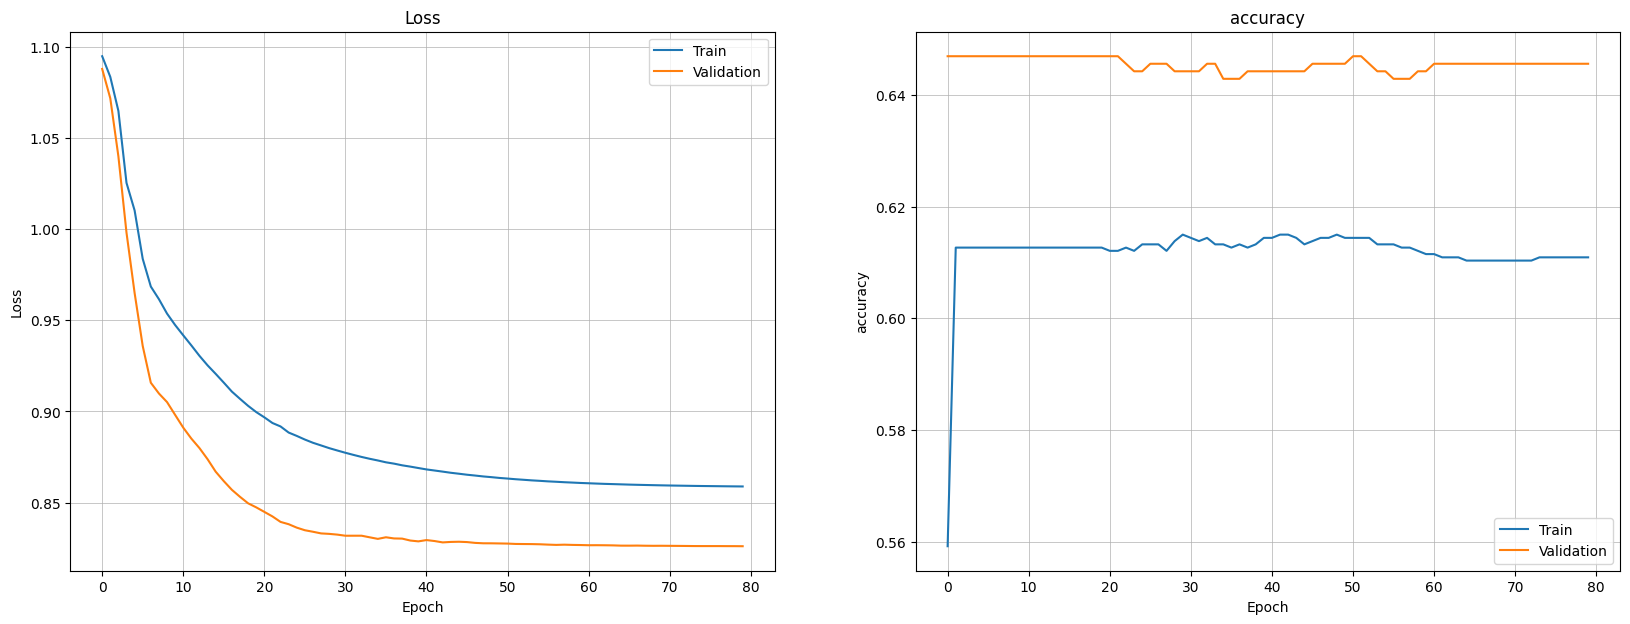

5/5 [==============================] - 0s 3ms/step - loss: 0.8841 - accuracy: 0.6495
✅ Model evaluated: loss 0.88 accuracy 0.65


Accuracy baseline fold n°1 = 0.39
Accuracy LSTM fold n°1 = 0.65
🏋🏽‍♂️ Improvement/Decrease vs. Baseline: 65.85 % 

Fold n°2
Split-set shape:
X: (352, 7, 10), y: (352, 7)
Split-set shape:
X: (150, 7, 10), y: (150, 7)
--------------------------------------------------
fit_model executed in 12.65 seconds, using up to 19.3MB of RAM


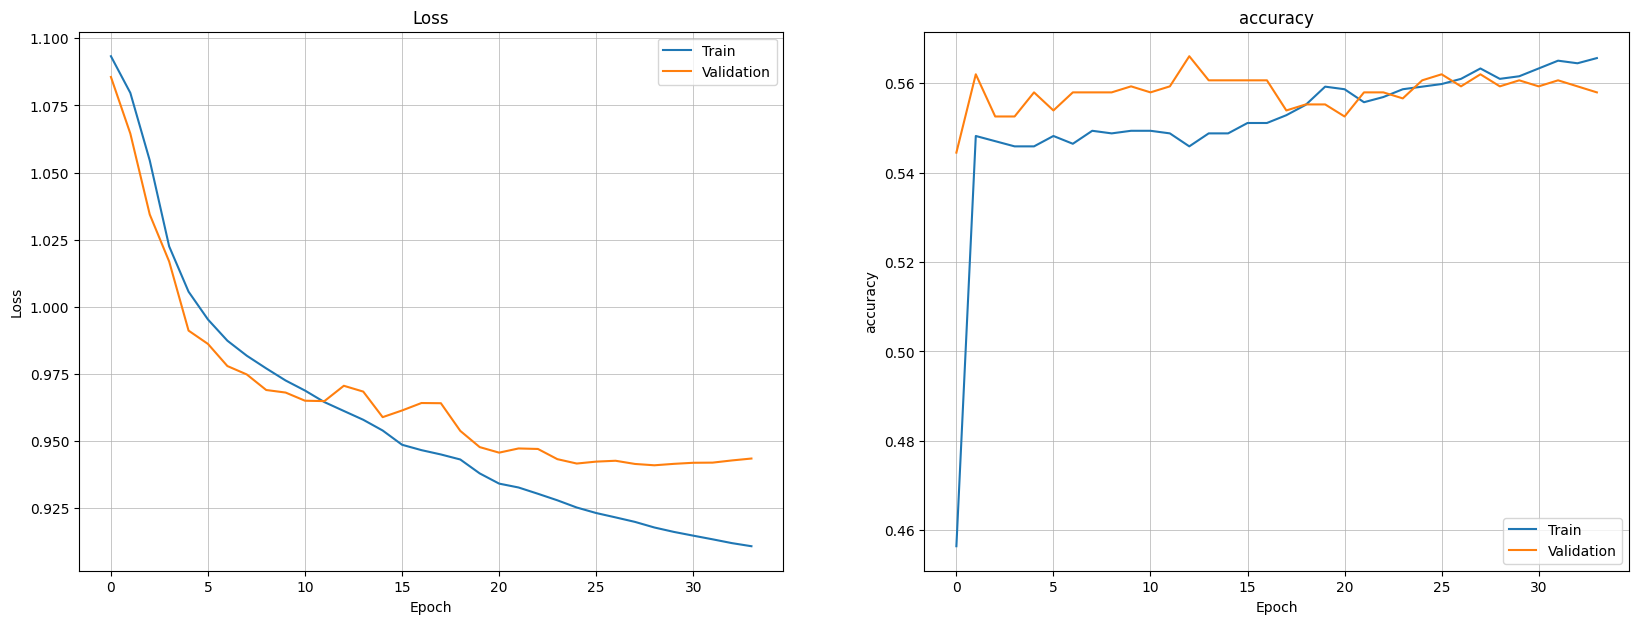

5/5 [==============================] - 0s 3ms/step - loss: 1.3034 - accuracy: 0.2343
✅ Model evaluated: loss 1.3 accuracy 0.23


Accuracy baseline fold n°2 = 0.39
Accuracy LSTM fold n°2 = 0.23
🏋🏽‍♂️ Improvement/Decrease vs. Baseline: -40.18 % 

Fold n°3
Split-set shape:
X: (352, 7, 10), y: (352, 7)
Split-set shape:
X: (150, 7, 10), y: (150, 7)
--------------------------------------------------
fit_model executed in 10.84 seconds, using up to 19.26MB of RAM


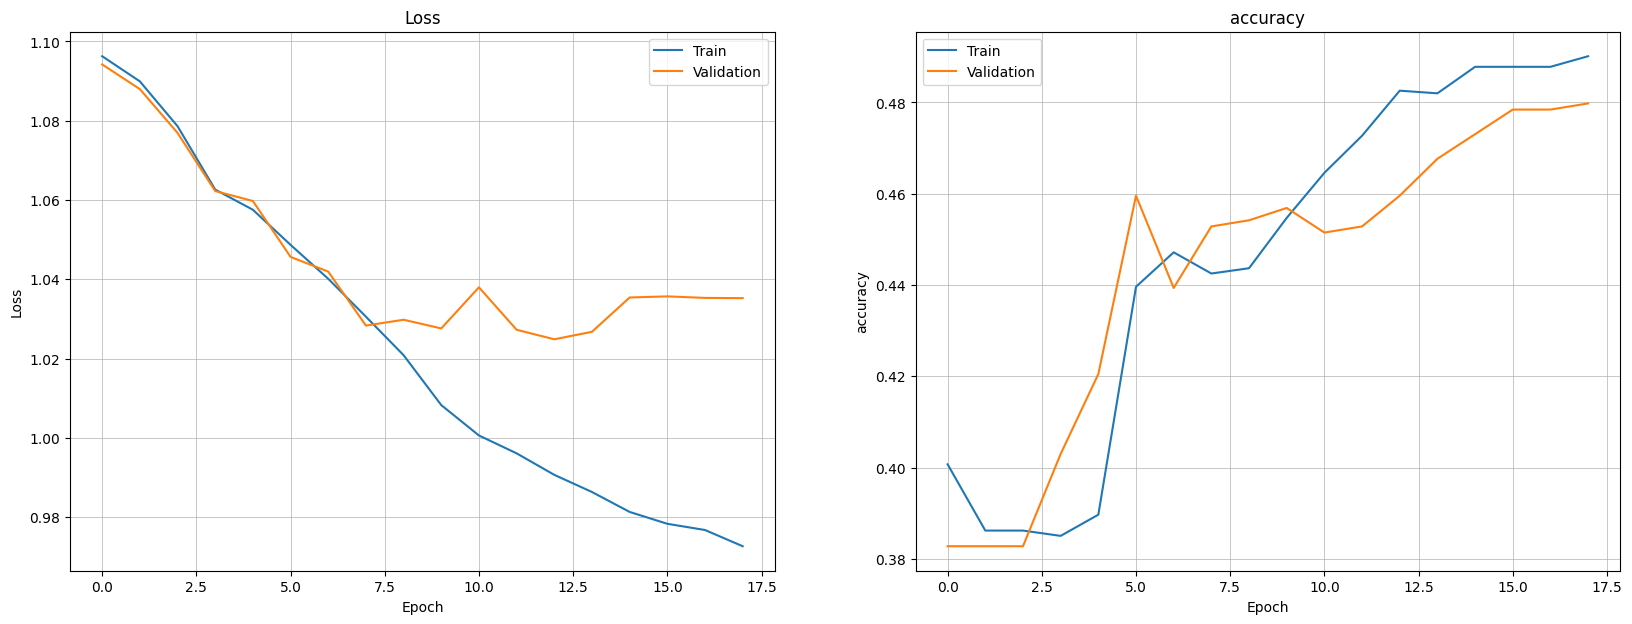

5/5 [==============================] - 0s 3ms/step - loss: 1.2258 - accuracy: 0.2695
✅ Model evaluated: loss 1.23 accuracy 0.27


Accuracy baseline fold n°3 = 0.39
Accuracy LSTM fold n°3 = 0.27
🏋🏽‍♂️ Improvement/Decrease vs. Baseline: -31.18 % 

Fold n°4
Split-set shape:
X: (352, 7, 10), y: (352, 7)
Split-set shape:
X: (150, 7, 10), y: (150, 7)
--------------------------------------------------
fit_model executed in 13.19 seconds, using up to 19.36MB of RAM


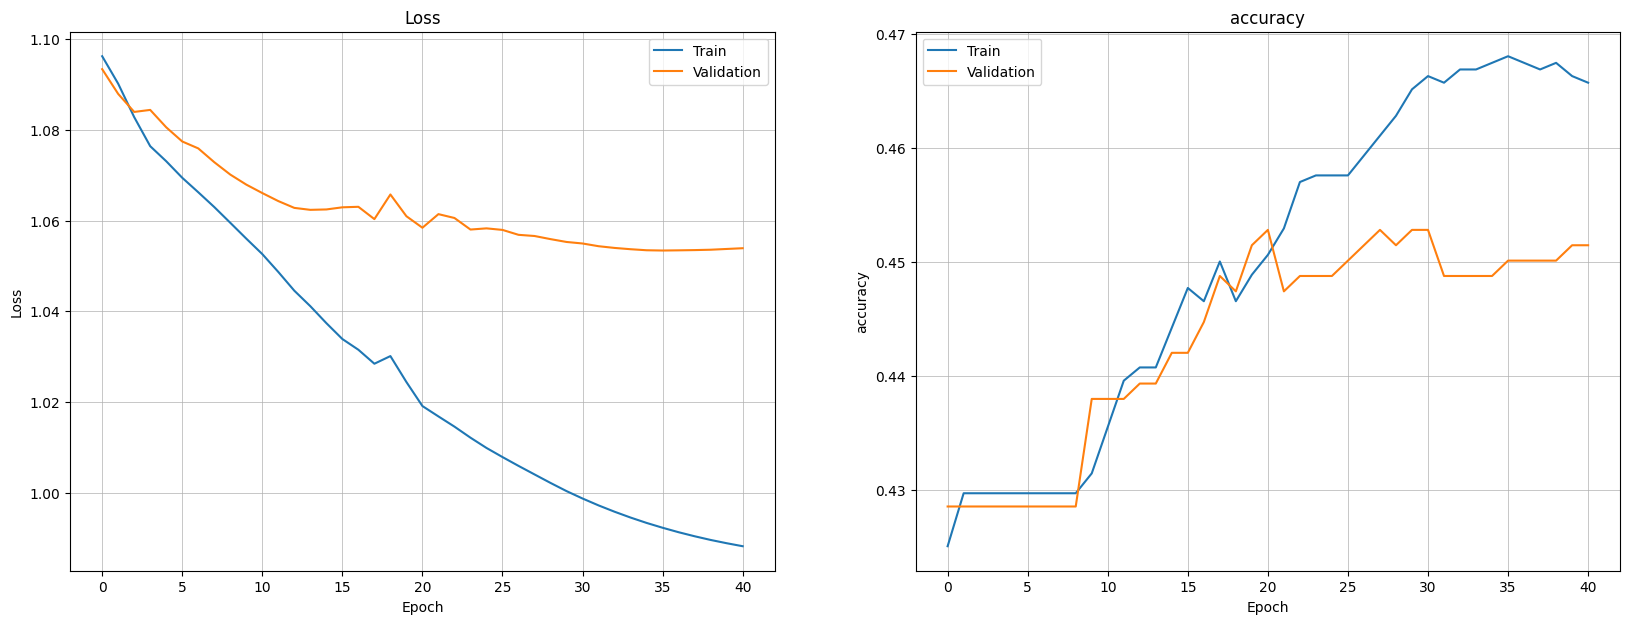

5/5 [==============================] - 0s 3ms/step - loss: 1.2263 - accuracy: 0.3600
✅ Model evaluated: loss 1.23 accuracy 0.36


Accuracy baseline fold n°4 = 0.39
Accuracy LSTM fold n°4 = 0.36
🏋🏽‍♂️ Improvement/Decrease vs. Baseline: -8.08 % 

Fold n°5
Split-set shape:
X: (352, 7, 10), y: (352, 7)
Split-set shape:
X: (150, 7, 10), y: (150, 7)
--------------------------------------------------
fit_model executed in 11.67 seconds, using up to 19.28MB of RAM


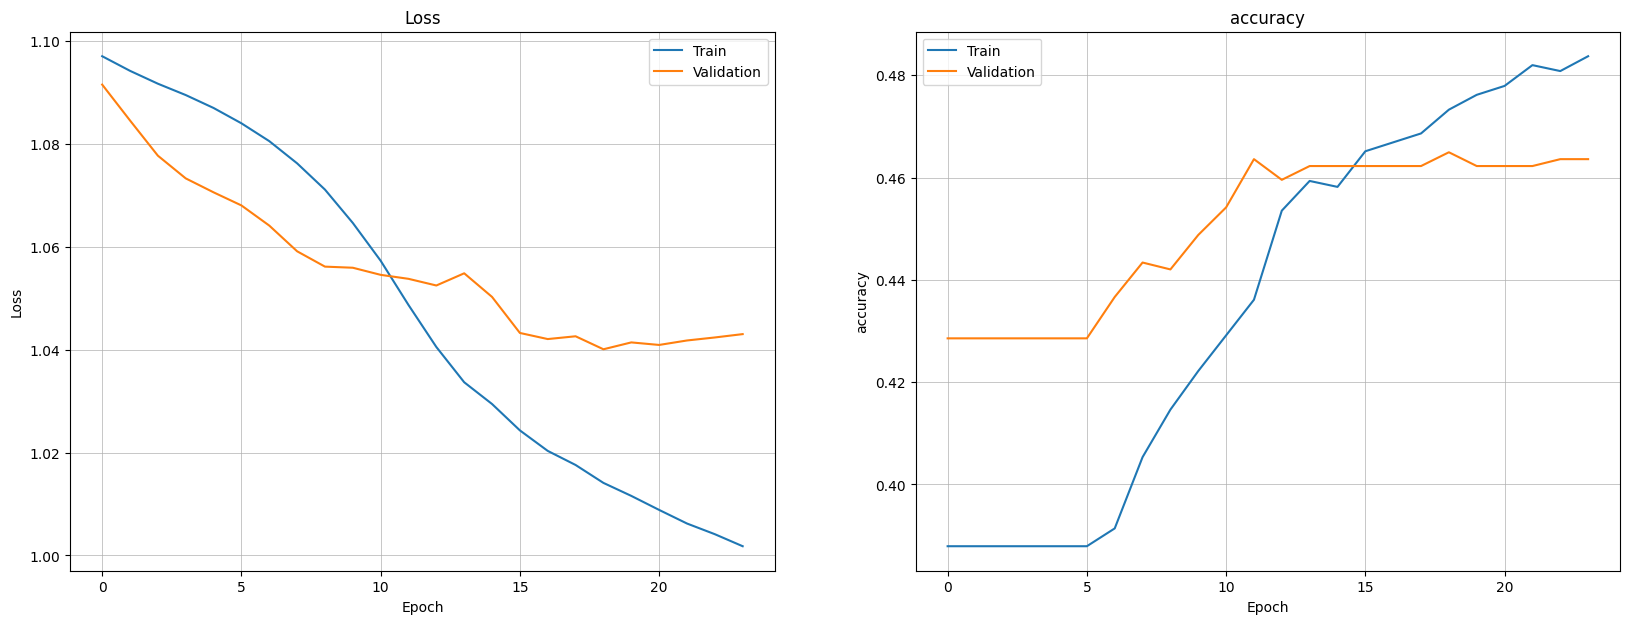

5/5 [==============================] - 0s 3ms/step - loss: 1.1938 - accuracy: 0.3857
✅ Model evaluated: loss 1.19 accuracy 0.39


Accuracy baseline fold n°5 = 0.39
Accuracy LSTM fold n°5 = 0.39
🏋🏽‍♂️ Improvement/Decrease vs. Baseline: -1.51 % 

Fold n°6
Split-set shape:
X: (352, 7, 10), y: (352, 7)
Split-set shape:
X: (150, 7, 10), y: (150, 7)
--------------------------------------------------
fit_model executed in 10.52 seconds, using up to 19.25MB of RAM


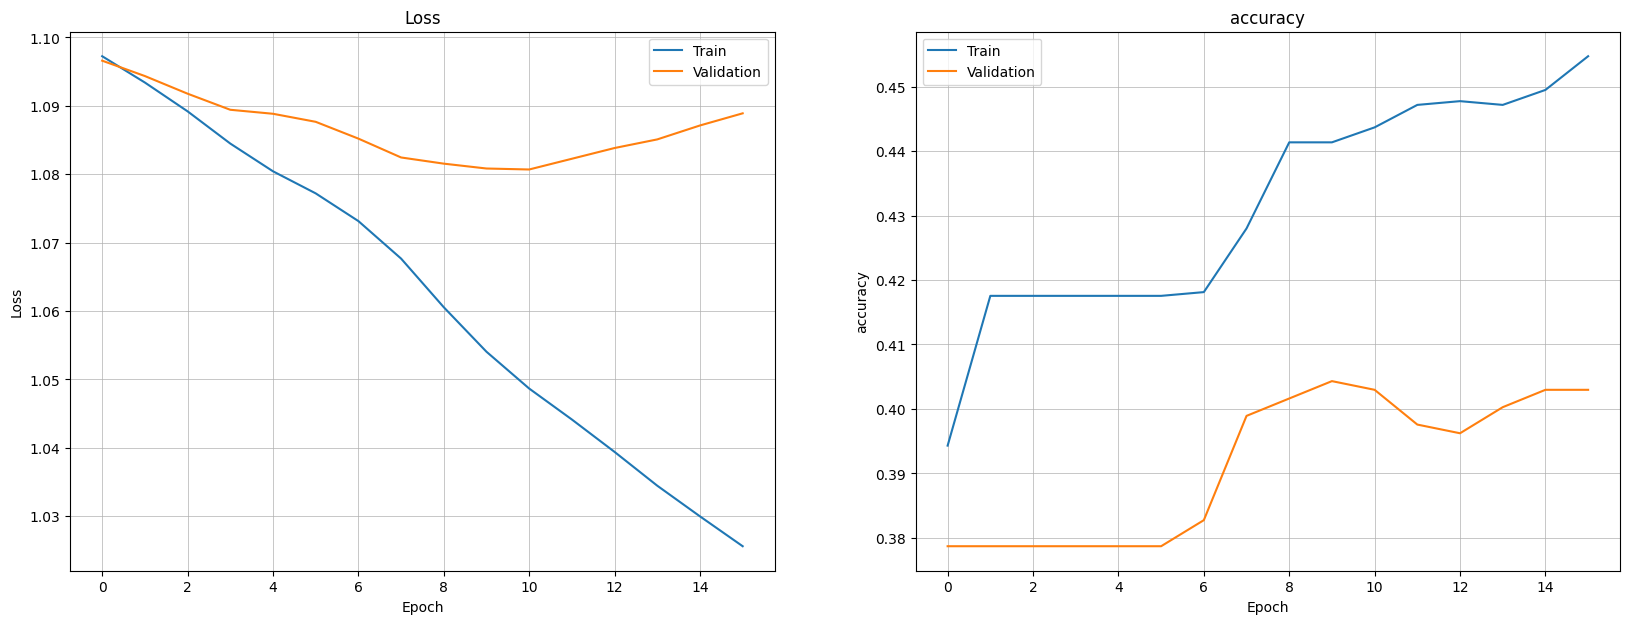

5/5 [==============================] - 0s 3ms/step - loss: 1.0720 - accuracy: 0.4971
✅ Model evaluated: loss 1.07 accuracy 0.5


Accuracy baseline fold n°6 = 0.39
Accuracy LSTM fold n°6 = 0.5
🏋🏽‍♂️ Improvement/Decrease vs. Baseline: 26.94 % 

Fold n°7
Split-set shape:
X: (352, 7, 10), y: (352, 7)
Split-set shape:
X: (150, 7, 10), y: (150, 7)
--------------------------------------------------
fit_model executed in 10.42 seconds, using up to 19.27MB of RAM


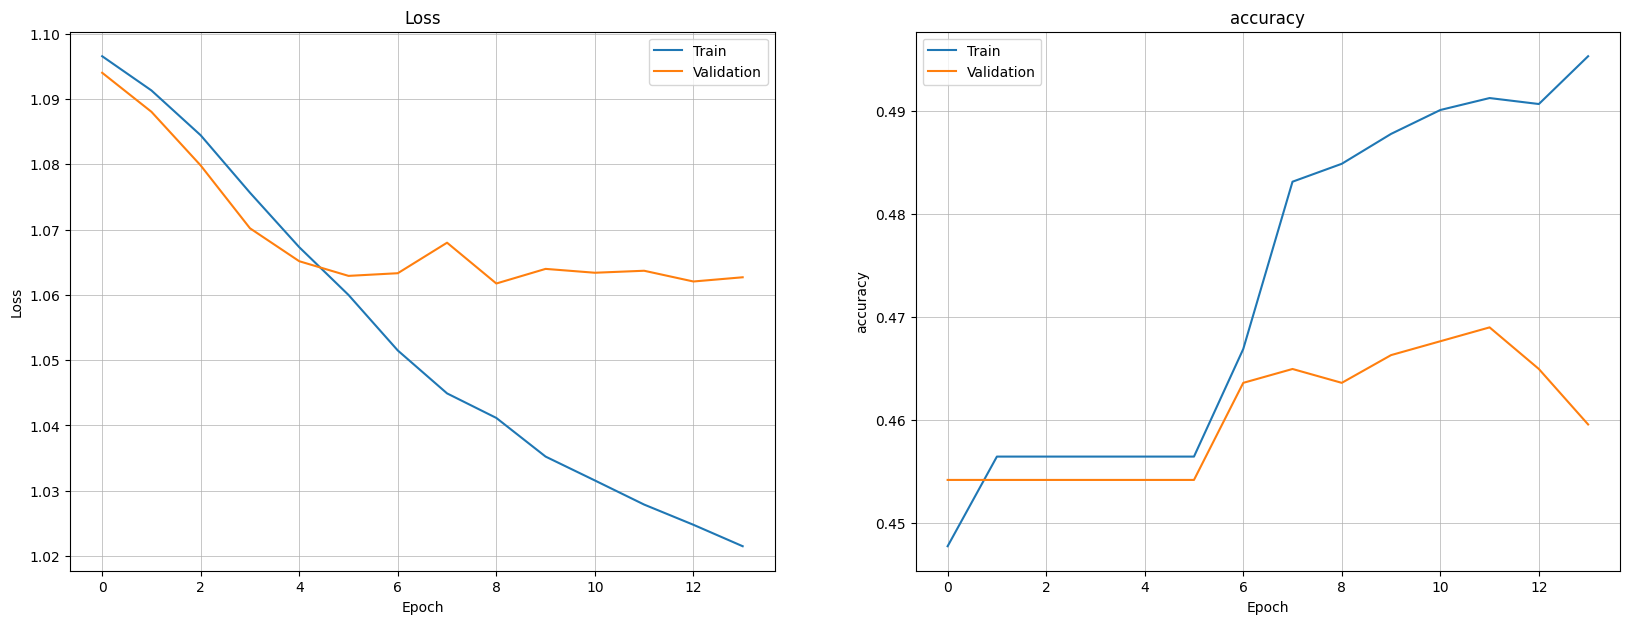

5/5 [==============================] - 0s 2ms/step - loss: 1.1512 - accuracy: 0.3314
✅ Model evaluated: loss 1.15 accuracy 0.33


Accuracy baseline fold n°7 = 0.39
Accuracy LSTM fold n°7 = 0.33
🏋🏽‍♂️ Improvement/Decrease vs. Baseline: -15.37 % 

Result for all folds
Average accuracy baseline = 0.39
Average accuracy LSTM = 0.39
🏋🏽‍♂️ Improvement/Decrease vs. Baseline: -0.5 % 



In [5]:
cross_validate(df)


# Model training

In [13]:
from workflow.params import FOLD_LENGTH, FOLD_STRIDE, STRIDE, TRAIN_TEST_RATIO, N_FEATURES, INPUT_LENGTH, TARGET, TARGET_COLUMN_IDX, N_TARGETS, OUTPUT_LENGTH, HORIZON



In [14]:
(df_train, df_test) = train_test_split(fold = df,
                                        train_test_ratio = TRAIN_TEST_RATIO,
                                        input_length = INPUT_LENGTH,
                                        horizon = HORIZON)



In [15]:
X_train, y_train = get_X_y(fold = df_train,
                        horizon = HORIZON,
                        input_length = INPUT_LENGTH,
                        output_length = OUTPUT_LENGTH,
                        stride = STRIDE)

X_test, y_test = get_X_y(df_test,
                        horizon = HORIZON,
                        input_length = INPUT_LENGTH,
                        output_length = OUTPUT_LENGTH,
                        stride = STRIDE)



Split-set shape:
X: (1229, 7, 11), y: (1229, 7)
Split-set shape:
X: (527, 7, 11), y: (527, 7)


In [16]:
model = init_model(X_train, y_train)
compile_model(model)
model, history = fit_model(model, X_train, y_train)




fit_model executed in 10.33 seconds, using up to 19.21MB of RAM


In [17]:
res = evaluate_model(model, X_test, y_test)
res




17/17 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.3513
✅ Model evaluated: loss nan accuracy 0.35


[nan, 0.3513147234916687]

# Prediction

In [30]:
y_true = df['ATMO']
y_pred = predict(model, X_test)
y_true.value_counts()








17/17 [==============================] - 0s 2ms/step


1    675
2    639
0    461
Name: ATMO, dtype: int64

In [19]:
y_true[-7:-1]


Date_time
2022-11-07    0
2022-11-08    0
2022-11-09    0
2022-11-10    0
2022-11-11    0
2022-11-12    1
Name: ATMO, dtype: int64

In [20]:
y_pred


array([[[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       ...,

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]]

In [21]:
y_pred[-1]


array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32)

# Confusion matrix (to finish)

In [15]:
# results_df = pd.DataFrame({"actual": y_true,
#                            "predicted": y_pred})

# confusion_matrix = pd.crosstab(index= results_df['actual'],
#                                columns = results_df['predicted'])

In [16]:
# #Create a Confusion Matrix heatmap from the above data
# import seaborn as sns
# sns.heatmap(cm, annot=True, linewidths = 0.01)